In [1]:
import torch
from torch_optimizer import RAdam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import wandb

from generator import QuantumGenerator
from generator import Generator
from discriminator.discriminator import Discriminator
from trainer import ClassicalTrainer, ClassifierTrainer
from trainer import QuantumTrainer
from data_loader import ImageDataset, ImageTransform, make_01_datapath_list, make_bas_4_datapath_list
from utils import visualize_accuracy
from optimizer.adam import Adam
%matplotlib inline


wandb.login()
config = dict(
    N = 8,
    num_epoch = 500,
    log_freq = 100,
    batch_size = 7,
    num_mask = 10,
    mean = 0,
    std = 3e-3,
    g_lr = 1e-3,
    d_lr = 1e-3,
    c_lr = 1e-3,
    betas = (0.9, 0.999),
)
wandb.init(
    project="GANProject",
    config=config,
    name="classical_sgan",
)

wandb: Currently logged in as: asuanro276 (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.11.0 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [2]:
datapath_list, label_list = make_01_datapath_list()
train_path_list, test_path_list, train_label_list, test_label_list = train_test_split(datapath_list, label_list, test_size=0.5)

We use cuda
----------------------------------------
Epoch: 100 ||G_Loss: 0.6489530631474087 ||D_Loss: 0.178896359034947 ||Epoch_Accuracy: 0.4642857313156128 ||Timer: 7.466862440109253
----------------------------------------
Epoch: 200 ||G_Loss: 0.5189579895564489 ||D_Loss: 0.17104302133832658 ||Epoch_Accuracy: 0.535714328289032 ||Timer: 7.022200107574463
----------------------------------------
Epoch: 300 ||G_Loss: 0.5414791192327226 ||D_Loss: 0.17687069943972994 ||Epoch_Accuracy: 0.5714285969734192 ||Timer: 7.019850969314575
----------------------------------------
Epoch: 400 ||G_Loss: 0.7676805768694197 ||D_Loss: 0.1555779618876321 ||Epoch_Accuracy: 0.535714328289032 ||Timer: 7.069827318191528
----------------------------------------
Epoch: 500 ||G_Loss: 1.0807736090251376 ||D_Loss: 0.0655111883367811 ||Epoch_Accuracy: 0.535714328289032 ||Timer: 6.986567974090576


_runtime,44
_timestamp,1626662865
_step,999
G_Loss,1.08077
D_Loss,0.06551
Epoch_Accuracy,0.53571
best_accuracy,0.64286


_runtime,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇████
_timestamp,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇████
_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
G_Loss,▂▂▂▂▃▃▄▁▄▅▂▅▆▆▃▄▅▂▂▃▃▅▄▇▁▄▁▄▅▁▃▄▃▆█▄▅▅▇▆
D_Loss,▇▇▆▅▄▄▄▇▂▂█▄▂▁█▂▂▆▆▅▄▂▃▁▅▄▇▃▃▇▅▃▃▁▁▃▅▂▃▁
Epoch_Accuracy,▆▄▄▆▆▃▄▄▄▃▁▄▄▄▄▆▆▄▇▇██▆▆▇▆▇▇▇▄▆▆▆▆▄▆▃▄▂▆


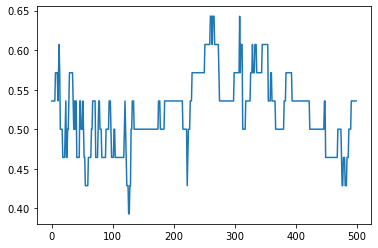

In [3]:
train_dataset = ImageDataset(train_path_list, wandb.config.num_mask, transform=ImageTransform(wandb.config.mean, wandb.config.std), label_list=train_label_list)
test_dataset = ImageDataset(test_path_list, wandb.config.num_mask, transform=ImageTransform(wandb.config.mean, wandb.config.std), label_list=test_label_list)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=wandb.config.batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=wandb.config.batch_size, shuffle=True)

G = Generator(input_size=20, output_size=wandb.config.N, hidden_size=40)
D = Discriminator(input_size=wandb.config.N, output_size=wandb.config.N, hidden_size=56, num_classes=2)
g_optimizer = torch.optim.Adam(G.parameters(), wandb.config.g_lr, wandb.config.betas)
d_optimizer = torch.optim.Adam(D.parameters(), wandb.config.d_lr, wandb.config.betas)

trainer_classical = ClassicalTrainer(
    generator=G,
    discriminator=D,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    g_optimizer=g_optimizer,
    d_optimizer=d_optimizer,
    z_dim=20,
    num_classes=2)
g_loss, d_loss, accuracy = trainer_classical.train(wandb.config.num_epoch, wandb.config.log_freq)
trainer_classical.visualize_G_image()
trainer_classical.visualize_logs(g_loss, d_loss)
plt.plot(range(wandb.config.num_epoch), accuracy, label="d_accuracy")


wandb.finish()

wandb: wandb version 0.11.0 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


We use cuda
----------------------------------------
Epoch: 100 ||C_Loss: 0.048243969678878784 ||Epoch_Accuracy: 0.5 ||Timer: 2.1246237754821777
----------------------------------------
Epoch: 200 ||C_Loss: 0.007147487314796308 ||Epoch_Accuracy: 0.5 ||Timer: 2.1507160663604736
----------------------------------------
Epoch: 300 ||C_Loss: 0.0029410186398308724 ||Epoch_Accuracy: 0.5 ||Timer: 1.9252707958221436
----------------------------------------
Epoch: 400 ||C_Loss: 0.0015721691961516626 ||Epoch_Accuracy: 0.5 ||Timer: 1.6587743759155273
----------------------------------------
Epoch: 500 ||C_Loss: 0.0007012181736172352 ||Epoch_Accuracy: 0.5 ||Timer: 1.627519130706787


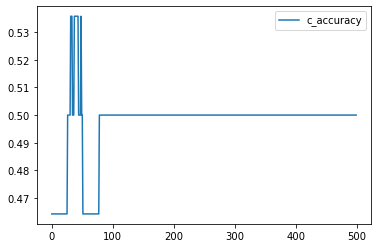

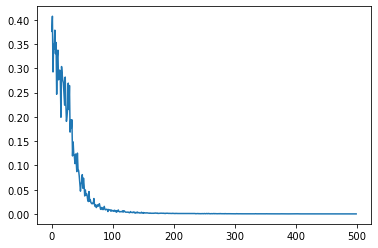

Epoch_C_Loss,0.0007
Epoch_Accuracy,0.5
_runtime,16
_timestamp,1626662885
_step,499
best_accuracy,0.53571


Epoch_C_Loss,█▅▆▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Epoch_Accuracy,▁▁▅█▁▁▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅
_runtime,▁▂▂▂▂▂▂▂▂▃▃▃▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇█
_timestamp,▁▂▂▂▂▂▂▂▂▃▃▃▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇█
_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


In [4]:
wandb.init(
    project="GANProject",
    config=config,
    name="classifier",
)

c_loss_list = []
c_accuracy_list = []
C = Discriminator(input_size=wandb.config.N, output_size=wandb.config.N, hidden_size=56, num_classes=2)
c_optimizer = torch.optim.Adam(C.parameters(), wandb.config.c_lr, wandb.config.betas)
trainer_classifier = ClassifierTrainer(
    classifier=C,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    c_optimizer=c_optimizer)
c_loss, c_accuracy = trainer_classifier.train(wandb.config.num_epoch, wandb.config.log_freq)

plt.plot(range(wandb.config.num_epoch), c_accuracy, label="c_accuracy")
plt.legend()
plt.show()

plt.plot(range(wandb.config.num_epoch), c_loss)
plt.show()

wandb.finish()

In [5]:
wandb.init(
    project="GANProject",
    config=config,
    name="quantum_sgan",
)

wandb.config.update({
    "g_lr": 7e-3,
    "d_lr": 1e-3,
    "num_mask": 10,
    "num_epoch": 300
})

wandb: wandb version 0.11.0 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


We use cuda
----------------------------------------
Epoch: 100 ||G_Loss: 3.0023165941238403 ||D_Loss: 5.376047253608704 ||Epoch_Accuracy: 0.4642857313156128 ||Timer: 19.669253826141357
----------------------------------------
Epoch: 200 ||G_Loss: 3.9198997020721436 ||D_Loss: 4.211838722229004 ||Epoch_Accuracy: 0.4642857313156128 ||Timer: 18.69124150276184
----------------------------------------
Epoch: 300 ||G_Loss: 5.504547715187073 ||D_Loss: 3.179428994655609 ||Epoch_Accuracy: 0.392857164144516 ||Timer: 18.61183786392212


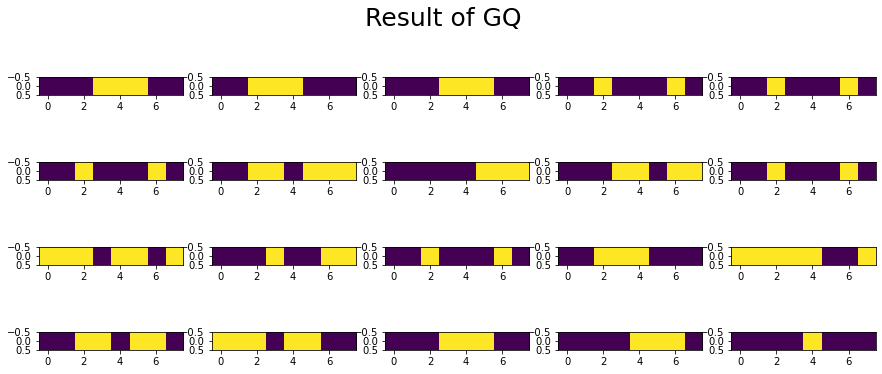

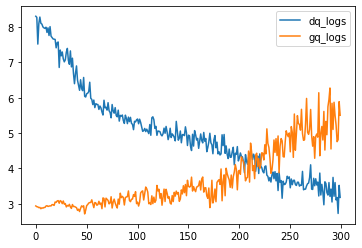

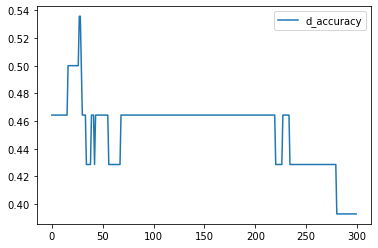

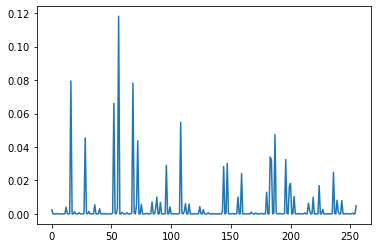

In [6]:
dq_accuracy_list = []

G = QuantumGenerator(num_qubit=wandb.config.N, depth=4, optimizer=Adam(wandb.config.g_lr, betas=wandb.config.betas))
D = Discriminator(input_size=wandb.config.N, output_size=wandb.config.N, hidden_size=56)
d_optimizer = torch.optim.Adam(D.parameters(), wandb.config.d_lr, wandb.config.betas)

trainer_quantum = QuantumTrainer(
    generator=G,
    discriminator=D,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    d_optimizer=d_optimizer,
    num_classes=2
)

g_loss, d_loss, accuracy = trainer_quantum.train(wandb.config.num_epoch, wandb.config.log_freq)

trainer_quantum.visualize_GQ_image(wandb.config.N)
trainer_quantum.visualize_logs(g_loss, d_loss)
plt.plot(range(wandb.config.num_epoch), accuracy, label="d_accuracy")
plt.legend()
plt.show()

trainer_quantum.visualize_probability()
plt.show()